In [27]:
import numpy as np
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("sentiment140dataset/training.1600000.processed.noemoticon.csv", 
                 names=['sentiment','tweet_id','timestamp','useless','username', 'tweet'],
                 encoding='ISO-8859-1')

In [7]:
df.head()

,sentiment,tweet_id,timestamp,useless,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Drop useless columns and format timestamp column

In [153]:
clean_df = df.drop(['sentiment', 'useless', 'username'], axis=1)
form = "%a %b %d %H:%M:%S PDT %Y"
clean_df['timestamp'] = pd.to_datetime(clean_df['timestamp'], format=form)
clean_df['date'] = clean_df['timestamp'].dt.floor('d')

Create Timeline of Tweets per day

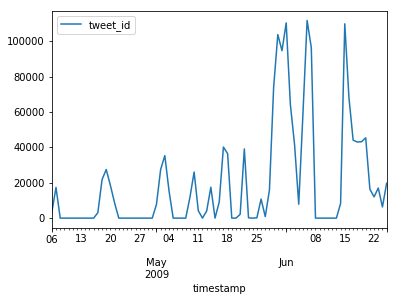

In [29]:
date_counts = clean_df.resample('D', on='timestamp').count()
date_counts.plot(kind='line',y='tweet_id')
plt.show()

In [50]:
only_real_dates = date_counts.where(date_counts['tweet_id']!=0)
only_real_dates.dropna()

,tweet_id,timestamp,tweet
timestamp,,,
2009-04-06,3360.0,3360.0,3360.0
2009-04-07,17311.0,17311.0,17311.0
2009-04-17,3084.0,3084.0,3084.0
2009-04-18,21754.0,21754.0,21754.0
2009-04-19,27469.0,27469.0,27469.0
2009-04-20,18460.0,18460.0,18460.0
2009-04-21,8587.0,8587.0,8587.0
2009-05-01,7716.0,7716.0,7716.0
2009-05-02,27434.0,27434.0,27434.0


Clean tweets up from punctuation and capitalization

In [171]:
import re
clean_df['processed_tweet'] = clean_df['tweet'].map(lambda x: re.sub('[-,\.!?]', '', x))
clean_df['processed_tweet'] = clean_df['processed_tweet'].map(lambda x: " ".join(list(filter(lambda word: not word.startswith("@") and not word.startswith("http"), x.split(" ")))))
clean_df['processed_tweet'] = clean_df['processed_tweet'].map(lambda x: x.lower())

clean_df.head()

,tweet_id,timestamp,tweet,date,processed_tweet
0,1467810369,2009-04-06 22:19:45,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06,awww that's a bummer you shoulda got david c...
1,1467810672,2009-04-06 22:19:49,is upset that he can't update his Facebook by ...,2009-04-06,is upset that he can't update his facebook by ...
2,1467810917,2009-04-06 22:19:53,@Kenichan I dived many times for the ball. Man...,2009-04-06,i dived many times for the ball managed to sav...
3,1467811184,2009-04-06 22:19:57,my whole body feels itchy and like its on fire,2009-04-06,my whole body feels itchy and like its on fire
4,1467811193,2009-04-06 22:19:57,"@nationwideclass no, it's not behaving at all....",2009-04-06,no it's not behaving at all i'm mad why am i h...


Found the idea to do exploratory analysis on words using the Wordcloud library here (https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0)

In [201]:
# Import the wordcloud library
from wordcloud import WordCloud
def make_wordcloud(dataframe):
    # Join the different processed titles together.
    long_string = ','.join(list(dataframe['processed_tweet'].values))
    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
    # Generate a word cloud
    wordcloud.generate(long_string)
    # Visualize the word cloud
    return wordcloud.to_image()

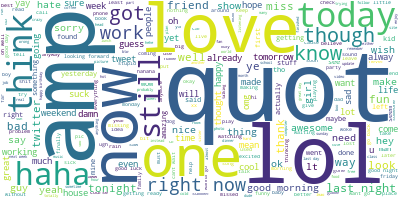

In [61]:
make_wordcloud(clean_df)

So we got minimal stuff out of the wordcloud, I wonder how LDA will do

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english', max_features=10000)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(clean_df['processed_tweet'])

In [187]:
count_data

<1600000x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 8802623 stored elements in Compressed Sparse Row format>

In [104]:
import datetime as dt
def print_topics(model, count_vec, n_top_words):
    words = count_vec.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
def run_lda(number_topics=5, number_words=10, cv=count_vectorizer, cd=count_data):
    start_time = dt.datetime.now()
    lda = LatentDirichletAllocation(n_components=number_topics, n_jobs=-1, learning_method='online')
    lda.fit(cd)
    print(f"{number_topics} topics found via LDA with {number_words} words:")
    print_topics(lda, cv, number_words)
    print(f"took {(dt.datetime.now() - start_time).seconds/60} minutes to run this model")

In [89]:
run_lda()

5 topics found via LDA with 10 words:

Topic #0:
haha just twitter happy love awesome yay hey little lt

Topic #1:
love amp new know just thank tonight yeah like best

Topic #2:
going day work today tomorrow want nice night time hope

Topic #3:
good lol thanks like day just come fun oh yes

Topic #4:
quot ll good morning wait right im getting miss watching


NameError: name 'start' is not defined

In [47]:
count_data

<1600000x801771 sparse matrix of type '<class 'numpy.int64'>'
	with 11006230 stored elements in Compressed Sparse Row format>

In [75]:
len(count_vectorizer.stop_words_)

403794

In [91]:
run_lda(number_topics=10)

10 topics found via LDA with 10 words:

Topic #0:
got im twitter yeah gonna miss oh wish watch amazing

Topic #1:
love ll hope wait better think just little ok long

Topic #2:
work know like don today want just really thank feel

Topic #3:
amp watching lt just fun soon going guys hi let

Topic #4:
day good time morning happy great nice tomorrow yay ve

Topic #5:
new haha tonight say good like look movie looking cool

Topic #6:
thanks going yes week need friends thing make excited just

Topic #7:
hey like good school life having pretty just ya welcome

Topic #8:
home right awesome best just sure doing sorry working song

Topic #9:
quot lol night did come today cute coming hate sun


NameError: name 'start' is not defined

In [93]:
run_lda(number_topics=50)

PicklingError: Could not pickle the task to send it to the workers.

In [94]:
run_lda(number_topics=20)

PicklingError: Could not pickle the task to send it to the workers.

In [191]:
def chunk_lda(data_chunks=[clean_df], n_topics=5, n_words=10):
    for chunk in data_chunks:
        # Initialise the count vectorizer with the English stop words
        cv = CountVectorizer(stop_words='english', max_features=10000)
        # Fit and transform the processed titles
        cd = cv.fit_transform(chunk['processed_tweet'])
        print(f"Chunk at time range {chunk['timestamp'].min()} through {chunk['timestamp'].max()}")
        run_lda(number_topics=n_topics, number_words=n_words, cv=cv, cd=cd)

In [194]:
def chunk(dataset=clean_df):
    d = only_real_dates.dropna()
    rtn = []
    temp = []
    for ind in d.index:
        if temp == [] or temp[-1] + pd.DateOffset(1) == ind:
            temp.append(ind)
        else:
            rtn.append(dataset[clean_df['date'].isin(temp)])
            temp = []
    return rtn

In [193]:
chunks_by_missing_day = chunk()
chunk_lda(data_chunks=chunks_by_missing_day)

Chunk at time range 2009-04-06 22:19:45 through 2009-04-07 08:46:10
5 topics found via LDA with 10 words:

Topic #0:
good morning today work day did going doing people man

Topic #1:
twitter day just nice good like come work gonna looking

Topic #2:
quot going ll just haha night home school week thank

Topic #3:
new don amp know love like want lol really feel

Topic #4:
just thanks time got im ve happy think need right
took 0.8333333333333334 minutes to run this model
Chunk at time range 2009-04-18 06:53:45 through 2009-04-21 04:22:15
5 topics found via LDA with 10 words:

Topic #0:
quot morning good just like lol got day think thank

Topic #1:
time thanks know new ll just day great haha ve

Topic #2:
twitter happy need got yes watching sorry look working finally

Topic #3:
love amp day did way just nice gonna miss days

Topic #4:
going good work today really fun night tomorrow like getting
took 3.6666666666666665 minutes to run this model
Chunk at time range 2009-05-02 00:00:01 throug

In [169]:
chunk_lda(data_chunks=chunk_by_missing_day, n_topics=10)

NameError: name 'chunk_by_missing_day' is not defined

We keep getting some weak words so maybe remove all of the small lesser meaning words and larger more meaningful words will appear, also remove the $"&quot;"$ and $"&amp;"$ symbols that keep appearing and appear to mean that we are using a quote or an ampersand respectively

In [207]:
clean_big_words = clean_df.copy()
clean_big_words['processed_tweet'] = clean_big_words['processed_tweet'].map(lambda x: " ".join(list(filter(lambda word: not len(word) <= 3, x.split(" ")))))
clean_big_words['processed_tweet'] = clean_big_words['processed_tweet'].map(lambda x: x.replace("&amp;", "").replace("&quot;", ""))

Try making a wordcloud with this new dataset

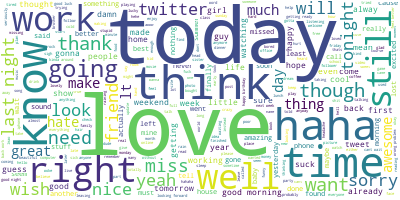

In [208]:
make_wordcloud(clean_big_words)

In [209]:
clean_big_words[clean_big_words['processed_tweet'].str.match("quot")]

,tweet_id,timestamp,tweet,date,processed_tweet
22817,1557577019,2009-04-19 04:56:10,To quote The Chemical Brothers. &quot;The time...,2009-04-19,quote chemical brothers the time come push but...
61416,1686720889,2009-05-03 06:32:01,Quote from yesterday at the beach: you betta k...,2009-05-03,quote from yesterday beach: betta knock gramma...
73585,1694564546,2009-05-04 03:11:41,The quote in the middle of this section is di...,2009-05-04,quote middle this section discouraging i'll
112311,1825408661,2009-05-17 05:35:32,i quote my boyfriends momma: &quot;holy crap y...,2009-05-17,quote boyfriends momma: holy crap you're getti...
115776,1827212742,2009-05-17 10:13:54,@Stickyplasters Quote: &quot;poop! Have you t...,2009-05-17,quote: poop have tried furious constant mastu...
136397,1880089835,2009-05-22 00:04:04,No quote from telly or movies today,2009-05-22,quote from telly movies today
153572,1932988085,2009-05-26 22:42:24,Quote of the day by Alexis Gosselin &quot;Dadd...,2009-05-26,quote alexis gosselin daddy don't want leave a...
188502,1968892589,2009-05-29 22:28:46,Let me quote the song This World by Schoolboy ...,2009-05-29,quote song this world schoolboy humor i'm gett...
227740,1978119930,2009-05-30 22:29:40,"To quote Jahunka, &quot;OMGGG I am so hungry. ...",2009-05-30,quote jahunka omggg hungry time late night sn...
250355,1983198685,2009-05-31 12:41:42,...and I quote: &quot;I got a lot of them&quot...,2009-05-31,quote: i them gonna long


In [210]:
clean_big_words[clean_big_words['processed_tweet'].str.match("amp")]

,tweet_id,timestamp,tweet,date,processed_tweet
238037,1980330323,2009-05-31 06:25:32,ampung.udah muter2 di google gk nemu juga soun...,2009-05-31,ampungudah muter2 google nemu juga sound effec...
328343,2010581350,2009-06-02 17:37:23,ampf! i can't use my TweetDeck.,2009-06-02,ampf can't tweetdeck
335859,2013878631,2009-06-02 23:49:51,not amping this bio! cells are not my thing w...,2009-06-02,amping this cells thing really cares about thl...
404450,2058428384,2009-06-06 14:55:24,I had to amputate my mullet.,2009-06-06,amputate mullet
424404,2063088361,2009-06-07 01:19:37,man i'm so amped to make music. can't wait for...,2009-06-07,amped make music can't wait sunday it's gonna ...
489831,2183126663,2009-06-15 14:04:53,Not amped to work tomorrow,2009-06-15,amped work tomorrow
556334,2204254707,2009-06-17 01:44:00,ampft hirap kumain,2009-06-17,ampft hirap kumain
567679,2207269423,2009-06-17 07:42:49,Ya ampring. Chips poker gw 0 dolar.,2009-06-17,ampring chips poker dolar
657525,2241058763,2009-06-19 10:29:30,why are my amps expired?,2009-06-19,amps expired
736319,2264984226,2009-06-21 05:29:08,ya ampun globaltv! lebih banyak nonton iklan t...,2009-06-21,ampun globaltv lebih banyak nonton iklan timba...


In [211]:
clean_big_words[clean_big_words['processed_tweet'].str.match("&")]

,tweet_id,timestamp,tweet,date,processed_tweet
859,1468023065,2009-04-06 23:18:32,@kameelahwrites &lt;33 codez....they've been M...,2009-04-06,&lt;33 codezthey've been
1448,1468157393,2009-04-07 00:01:44,i &lt;3 CIGS..RIP,2009-04-07,&lt;3 cigsrip
5362,1469059496,2009-04-07 05:02:09,@SL05NED hey not bad lol &gt;&lt; well im writ...,2009-04-07,&gt;&lt; well writing notes notes more notes t...
5925,1469237014,2009-04-07 05:42:55,my &lt;3 is so heavy! Another bout of tears.,2009-04-07,&lt;3 heavy another bout tears
6821,1469577445,2009-04-07 06:48:01,&lt;- likes to go out on this beautiful sunny ...,2009-04-07,&lt; likes this beautiful sunny drive work
10480,1550933976,2009-04-18 07:40:37,"&gt; brother is on his laptop so i cant edit, ...",2009-04-18,&gt; brother laptop cant edit forgot scans whi...
12896,1552027979,2009-04-18 10:35:55,@ladaw &lt;----- this sad face is saying ther...,2009-04-18,&lt; this face saying there's such thing
15957,1555724363,2009-04-18 20:30:58,&lt;&lt;------------------------- Will NEVA s...,2009-04-18,&lt;&lt; will neva show belly again
16616,1555983512,2009-04-18 21:16:30,@Anna__Rose hey ily. &lt;3 I am missing work p...,2009-04-18,&lt;3 missing work parties with alice
18384,1556584540,2009-04-18 23:26:19,&lt;---- this is my face! @nick_carter needs t...,2009-04-18,&lt; this face needs make that shout pooh joke


Lets remove the $"&gt;"$ and $"&lt;"$ symbols as well because they seem to represent "greater than" (>) and "less than" (<) symbols respectively and then remove the small words again because they may have some trailing characters (like '3')

In [215]:
clean_big_words['processed_tweet'] = clean_big_words['processed_tweet'].map(lambda x: x.replace("&lt;", "").replace("&gt;", ""))
clean_big_words['processed_tweet'] = clean_big_words['processed_tweet'].map(lambda x: " ".join(list(filter(lambda word: not len(word) <= 3, x.split(" ")))))
clean_big_words[clean_big_words['processed_tweet'].str.match("&")]


,tweet_id,timestamp,tweet,date,processed_tweet


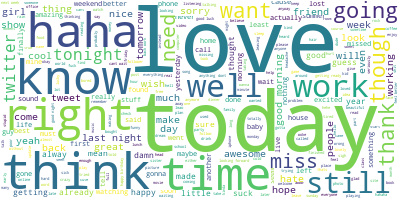

In [216]:
make_wordcloud(clean_big_words)

Lets try making the overarching lda

In [217]:
chunk_lda([clean_big_words])

Chunk at time range 2009-04-06 22:19:45 through 2009-06-25 10:28:31
5 topics found via LDA with 10 words:

Topic #0:
good thanks just great awesome week time sure little life

Topic #1:
night think don like hope know want need nice better

Topic #2:
going ll today morning work just thank home wait right

Topic #3:
love haha just happy time like yeah people know make

Topic #4:
twitter watching good love gonna miss amazing follow birthday tweet
took 57.56666666666667 minutes to run this model


Lets try with date chunking now

In [218]:
chunk_big_words = chunk(clean_big_words)
chunk_lda(chunk_big_words)

Chunk at time range 2009-04-06 22:19:45 through 2009-04-07 08:46:10
5 topics found via LDA with 10 words:

Topic #0:
ll home happy need wait days working wish miss soon

Topic #1:
work just great good time gonna awesome having going watching

Topic #2:
love know twitter don want nice better like think yeah

Topic #3:
morning today thanks really just going ve getting feel make

Topic #4:
good night like hope just haha people right today thank
took 0.7666666666666667 minutes to run this model
Chunk at time range 2009-04-18 06:53:45 through 2009-04-21 04:22:15
5 topics found via LDA with 10 words:

Topic #0:
good thanks morning watching like thank looking having time friends

Topic #1:
work twitter going nice today time just happy getting yeah

Topic #2:
like really ll just night don want need tomorrow going

Topic #3:
just love sorry life look wanna start right hear does

Topic #4:
good haha know wait days ve think dont thing time
took 2.816666666666667 minutes to run this model
Chunk at

In [219]:
clean_big_words[clean_big_words['processed_tweet'].str.match("ll")]

,tweet_id,timestamp,tweet,date,processed_tweet
51269,1678870586,2009-05-02 07:56:44,@mabeliam U lleft me What? Old fashion street...,2009-05-02,lleft what fashion street quotes aren't permit...
66578,1691860731,2009-05-03 18:45:56,llueve,2009-05-03,llueve
114423,1826280607,2009-05-17 08:07:56,LLBean is out of every single item I wanted to...,2009-05-17,llbean every single item wanted order
168841,1962323212,2009-05-29 10:52:08,@StylistaMunchee I lluuvv u too.. ahhh im gon...,2009-05-29,lluuvv ahhh gonna miss evenn moreee
196342,1970697869,2009-05-30 04:53:18,Lloyd has now taken back his twitter T_T from....,2009-05-30,lloyd taken back twitter from lois
251810,1983570992,2009-05-31 13:24:46,llistening to music - really bored on twitter...,2009-05-31,llistening music really bored twitter replys k...
254623,1984295128,2009-05-31 14:49:36,me lleva... Age of Empire III no funka con Win...,2009-05-31,lleva empire funka windows
262383,1986177436,2009-05-31 18:26:41,Lloonngg asss dayy and its no where near over ...,2009-05-31,lloonngg asss dayy where near over missed hills
289662,1995081287,2009-06-01 12:55:14,no me llegan mails,2009-06-01,llegan mails
307114,2000396259,2009-06-01 22:01:29,U KNO U LLAME WEN U HAVEN'T FUCKED WIT 1 BAD B...,2009-06-01,llame haven't fucked bitch


In [221]:
clean_big_words[clean_big_words['processed_tweet'].str.match("we've")]

,tweet_id,timestamp,tweet,date,processed_tweet
475,1467931501,2009-04-06 22:52:13,We've been good. I'm not liking the snow right...,2009-04-06,we've been good liking snow right getting used...
6966,1469634135,2009-04-07 06:58:06,@paulingham we've only got around 9 eps left o...,2009-04-07,we've only around left
15792,1554495873,2009-04-18 17:09:13,@joebobhawkins we've decided that home improve...,2009-04-18,we've decided that home improvements best left...
18656,1556658142,2009-04-18 23:45:18,@psam We've got too many resources these days...,2009-04-18,we've many resources these days aint doing any...
34282,1564756711,2009-04-20 04:48:58,Gah - we've now crammed so much into Clover we...,2009-04-20,we've crammed much into clover we're getting o...
40451,1573791644,2009-04-21 02:52:48,@catt231 We've had our summer already I think,2009-04-21,we've summer already think
45722,1677229025,2009-05-02 01:02:27,we've ran out of coffee,2009-05-02,we've coffee
50255,1678431636,2009-05-02 06:41:13,We've lost Tiny ham I hope you're safe and c...,2009-05-02,we've lost tiny hope you're safe come back min...
60838,1686524968,2009-05-03 05:47:47,@giladby we've all been living in a box for to...,2009-05-03,we've been living long
65643,1691089236,2009-05-03 17:04:07,@shareski we've only had ours a couple of mont...,2009-05-03,we've only ours couple months it's more miss than


In [222]:
clean_big_words[clean_big_words['processed_tweet'].str.match("we'll")]

,tweet_id,timestamp,tweet,date,processed_tweet
13555,1553299772,2009-04-18 13:53:57,@ddlovato we'll miss you toooooooo xoxo,2009-04-18,we'll miss toooooooo xoxo
23105,1557645083,2009-04-19 05:17:46,"We'll miss Robbie aka R2D2 Good show tonight,...",2009-04-19,we'll miss robbie r2d2 good show tonight good ...
26977,1558999457,2009-04-19 09:59:15,@geekigirl we'll have to have another girls n...,2009-04-19,we'll have have another girls night fabulous f...
27880,1559416932,2009-04-19 11:05:05,@ladygaga we'll miss u in germany have fun in...,2009-04-19,we'll miss germany have
57890,1685768103,2009-05-03 01:59:02,@montypop Aw no We'll miss you at the com. Go...,2009-05-03,we'll miss good luck with work
60806,1686510797,2009-05-03 05:44:17,We'll never make it in time to see lance NOW! ...,2009-05-03,we'll never make time lance
61155,1686632102,2009-05-03 06:12:37,@stephenfry We'll have your spot in the Colash...,2009-05-03,we'll have your spot colaship next season this...
63472,1687556329,2009-05-03 09:00:29,@robbarry @bugabundo We'll soon find out if #u...,2009-05-03,we'll soon find #ubuntu uses core soon used cr...
64960,1690755404,2009-05-03 16:18:09,@chaculvin We'll see,2009-05-03,we'll
68145,1692706016,2009-05-03 20:35:33,@Yours_TruLee awe man we'll still talk,2009-05-03,we'll still talk


Contractions are a problem, luckily this website has a handy solution for replacing contractions with their full word meanings (https://mlwhiz.com/blog/2019/01/17/deeplearning_nlp_preprocess/) so lets replace them then remove the small words again

In [226]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
clean_big_words['processed_tweet'] = clean_big_words['processed_tweet'].map(lambda x: " ".join([contraction_dict[word] if word in contraction_dict.keys() else word for word in x.split(" ")]))
clean_big_words['processed_tweet'] = clean_big_words['processed_tweet'].map(lambda x: " ".join(list(filter(lambda word: not len(word) <= 3, x.split(" ")))))
clean_big_words[clean_big_words['processed_tweet'].str.match("we'll")]

,tweet_id,timestamp,tweet,date,processed_tweet


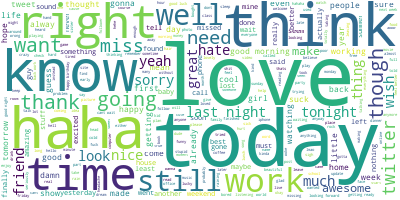

In [227]:
make_wordcloud(clean_big_words)

In [228]:
chunk_lda([clean_big_words])

Chunk at time range 2009-04-06 22:19:45 through 2009-06-25 10:28:31
5 topics found via LDA with 10 words:

Topic #0:
love going want watching right just awesome week sure does

Topic #1:
good thanks like haha happy really nice just feel miss

Topic #2:
night today tomorrow morning time work tonight love home gonna

Topic #3:
just twitter thank wait think like good people weekend amazing

Topic #4:
come yeah know good days getting just ready finally need
took 57.85 minutes to run this model


In [229]:
chunk_big_words = chunk(clean_big_words)
chunk_lda(chunk_big_words)

Chunk at time range 2009-04-06 22:19:45 through 2009-04-07 08:46:10
5 topics found via LDA with 10 words:

Topic #0:
just time today happy like home having work days trying

Topic #1:
just like love doing looking cool think great cold right

Topic #2:
today like twitter feel wait working awesome make things help

Topic #3:
thanks know love need nice haha really school yeah thank

Topic #4:
good morning going work hope just night sleep better want
took 0.6833333333333333 minutes to run this model
Chunk at time range 2009-04-18 06:53:45 through 2009-04-21 04:22:15
5 topics found via LDA with 10 words:

Topic #0:
twitter need just awesome like does long follow want guys

Topic #1:
thanks love just happy good thank people sorry look weather

Topic #2:
good like morning today going great night just haha work

Topic #3:
time work home school just getting come gonna miss today

Topic #4:
know tomorrow think watching going life make glad went thats
took 2.4166666666666665 minutes to run this m